### Loading data exchange rates data from kaggle


**Cross Validation for Robust Model Evaluation**

This project involves comparing two regression models i.e. Linear Regression and Support Vector regression using k-fold cross validation on a monolingual Fintech dataset. The models predict currency exchange rates using the data, and by using cross-validation, we find the best predictor out of the two models.

In [3]:
!pip install kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nachikethreddykatta","key":"c538ea2142cf6443c5369a09745f57d4"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shisui14/historical-exchange-rate-values-2000-2022


Dataset URL: https://www.kaggle.com/datasets/shisui14/historical-exchange-rate-values-2000-2022
License(s): unknown
  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 256MB/s]


This is the dataset imported from kaggle.com that we have used for this purpose.

In [5]:
!unzip historical-exchange-rate-values-2000-2022.zip


Archive:  historical-exchange-rate-values-2000-2022.zip
  inflating: Exchange Rate Info 2000-2022.csv  


In [6]:
import pandas as pd

df = pd.read_csv("Exchange Rate Info 2000-2022.csv") #exchange rates are with respect to indian rupee
print(df.head())
print(df.shape)

         Date       USD       EUR       GBP       JPY
0  2000-01-01  0.022992  0.022834  0.014229  2.350997
1  2000-01-02  0.022992  0.022834  0.014229  2.350997
2  2000-01-03  0.022972  0.022518  0.014119  2.336161
3  2000-01-04  0.022972  0.022295  0.014034  2.366774
4  2000-01-05  0.022972  0.022235  0.014000  2.387018
(8224, 5)


### Predicting exchange rate of USD based on EUR,GBP,JPY

In [7]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = df[['EUR', 'GBP', 'JPY']].values
Y = df['USD'].values

lin_reg = LinearRegression()
svr = SVR(kernel='rbf', C=10, epsilon=0.0001)

kf = KFold(n_splits=5, shuffle=True, random_state=42) # splits are set to 5 beacuase large splits increases runtime

y_pred_lin = cross_val_predict(lin_reg, X, Y, cv=kf)
mse_lin = mean_squared_error(Y, y_pred_lin)

y_pred_svr = cross_val_predict(svr, X, Y, cv=kf)
mse_svr = mean_squared_error(Y, y_pred_svr)

print(f"Linear Regression MSE: {mse_lin}")
print(f"SVR MSE: {mse_svr}")

Linear Regression MSE: 2.4186867759532896e-06
SVR MSE: 1.419018104316926e-06


**Methodology: k-fold Cross Validation**

This process involves splitting a dataset into K groups(here K=5 for our code), and do K rounds of testing. For Round 1; we train on K-1 groups and test the one group not chosen using the K-1 groups trained data. This iteration continues for all the K groups, the average of which gives a more credible value. Both models undergo this validation in our study here. [Source: www.geeksforgeeks.org]

In the above code cell, we are using python's Scikit-learn's Kfold to perform the cross validation(5 folds in our case). We import our models, LR and SVR. The C value in SVR determines how tough the model is penalizing errors that fall outside a particular range, which in turn is determined by the epsilon value. Further decreasing epsilon leads to drastic increase in runtime.  

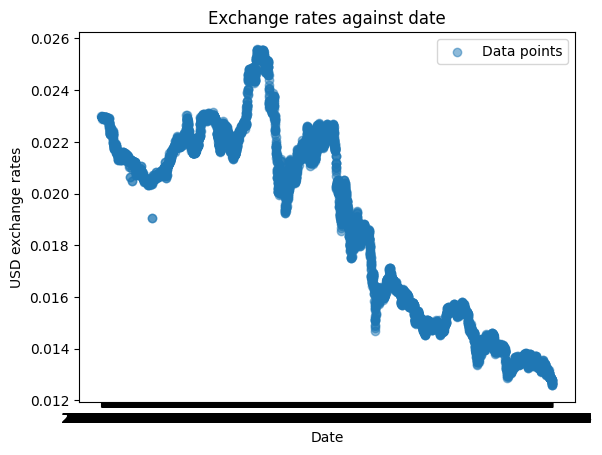

In [8]:
plt.scatter(df['Date'], Y, alpha=0.5, label="Data points")
plt.title("Exchange rates against date")
plt.xlabel("Date")
plt.ylabel("USD exchange rates")
plt.grid(False)
plt.legend()
plt.show()

Plot

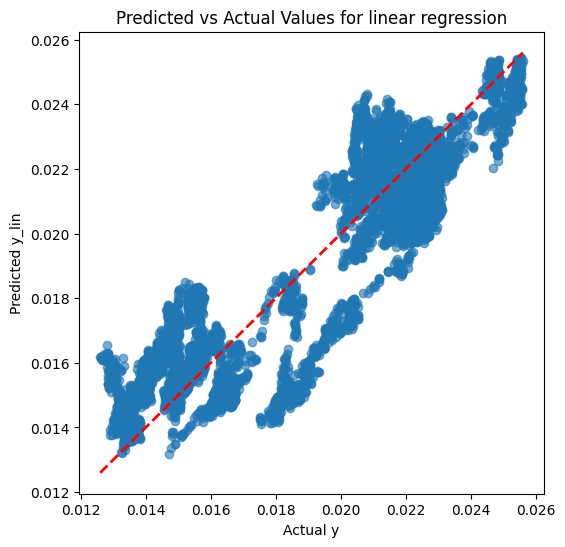

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y, y_pred_lin, alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)  # y = x line
plt.xlabel("Actual y")
plt.ylabel("Predicted y_lin")
plt.title("Predicted vs Actual Values for linear regression")
plt.show()

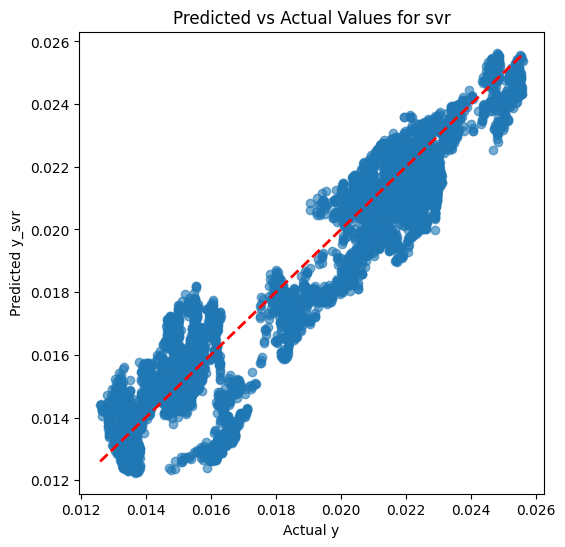

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y, y_pred_svr, alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)  # y = x line
plt.xlabel("Actual y")
plt.ylabel("Predicted y_svr")
plt.title("Predicted vs Actual Values for svr")
plt.show()

**Code Implementation**

The monolingual fintech dataset is split into 5 folds, and each fold is used once as a test set while the remaining four are used for training. By computing the Mean Squared Error(MSE), the performance of both the models are compared. Then we generate three plots; the first plot is a scatter plot of USD exchange rates vs time. The second and third plots compare the predicted vs actual values for both the models. The y=x line is also given along with the plots. The closer the points cluster around this line, the more accurate predictions the models make.

**CROSS -VALIDATION FOR ROBUST MODEL SELECTION IN FINTECH**

**Overview**

This document extends the concept of finding the best predictor to a more robust evaluation method called cross-validation. The primary purpose of this technique is to avoid selection bias and ensure that a model's performance evaluation is reliable. The provided example compares a Linear Regression model and a Support Vector Regression (SVR) model to find the best predictor for currency exchange rates in a FinTech application.

**Methodology: k-fold Cross Validation**

This process involves splitting a dataset into K groups(here K=5 for our code), and do K rounds of testing. For Round 1; we train on K-1 groups and test the one group not chosen using the K-1 groups trained data. This iteration continues for all the K groups, the average of which gives a more credible value. Both models undergo this validation in our study here. [Source: www.geeksforgeeks.org]

In the above code cell, we are using python's Scikit-learn's Kfold to perform the cross validation(5 folds in our case). We import our models, LR and SVR. The C value in SVR determines how tough the model is penalizing errors that fall outside a particular range, which in turn is determined by the epsilon value. Further decreasing epsilon leads to drastic increase in runtime.

**Fintech Applications**

K-fold cross validation implies more robust model evaluation, thereby reducing the risk of financial loss in the Fintech domain. Following are few applications of this method:

Fraud Detection: From data like transaction amount, location, time, merchant type etc., we can detect fake transactions among millions of transactions.

Customer Lifetime Value Protection: For a business, this method can help predict how much revenue can a customer bring overtime for the business, by utilizing data like purchase frequency, transaction size, churn probability etc. making it a good Business analytics tool.

Predict exchange rates: Like in this example, models used to predict exchange rates or price movements in cases of algorithmic trading, can be tested and validated using K-fold cross validation.

**Evaluation Metrics**

Using mean squared error (MSE) to quantify the performances of the models, we find that the Linear Regression model outperformed the SVR model. The lower MSE value for Linear Regression indicates that its predictions were closer to the actual USD exchange rates. This implies that the relationship between USD and the chosen currencies (EUR, GBP, and JPY) is mostly linear in nature. Further, the scatter plots show that the Linear Regression predictions align more closely with the reference line compared to SVR. The SVR model, while capable of capturing nonlinear patterns, introduced unnecessary complexity in this case, leading to higher error.

To conclude, the linear regression model turns out to be a better model for prediction than the SVR model for such a linear relationship data.
